# Synonymous DFE Binned plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import scipy.stats as stats 
from matplotlib.lines import Line2D

# Parameters

In [3]:
scale_syn=55  #In terms of 2Ns
Na=11293
shape_param_syn=0.14
s_dhet_syn_fromscale=scale_syn/(2*Na)
print(s_dhet_syn_fromscale)

0.0024351368104135306


In [4]:
s_mean_syn_fromscale=s_dhet_syn_fromscale*2*shape_param_syn
print(s_mean_syn_fromscale)

0.0006818383069157886


In [5]:
mu=1.44E-8 # Change this as necessary

In [6]:
shape_param_nonsyn=0.186
s_dhet_nonsyn=0.035344

In [7]:
color_conditions={'Non-Syn_DFE':'#99b3ff', 'Syn_DFE':'#cc0000'}
title_conditions={'Non-Syn_DFE':'$DFE_{Non-Syn}$', 'Syn_DFE':'$DFE_{Syn}$'}

# Generate DFE bins

In [12]:
#Generate a discretized true DFE
a=shape_param_syn
b=s_dhet_syn_fromscale

gamma_draws=stats.gamma.rvs(a, scale=b,size=100000)
counts,edges=np.histogram(gamma_draws,bins=[0,1E-5,1E-4,1E-3,1E-2,800000000000])
norm_counts=counts/100000
s_dhet_discretized_syn=norm_counts

In [13]:
s_dhet_discretized_syn

array([0.49416, 0.18644, 0.21891, 0.09994, 0.00055])

In [14]:
#Generate a discretized true DFE
a=shape_param_nonsyn
b=s_dhet_nonsyn

gamma_draws=stats.gamma.rvs(a, scale=b,size=100000)
counts,edges=np.histogram(gamma_draws,bins=[0,1E-5,1E-4,1E-3,1E-2,800000000000])
norm_counts=counts/100000
s_dhet_discretized_nonsyn=norm_counts

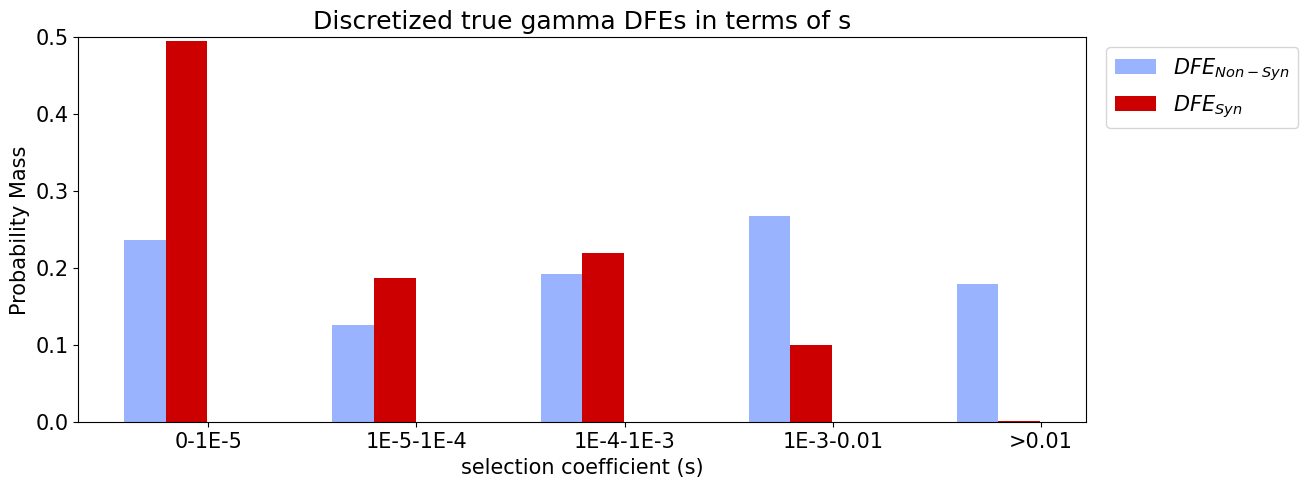

In [15]:
fig=plt.figure(figsize=[13,5])
ax=plt.gca()
plt.rcParams['font.size'] = '15'

bins=len(s_dhet_discretized_nonsyn)
categories=2 #+1 accounts for the slim true values, which is plotted separately

width = 0.25
totalwidthbin=width*(categories+3)
ind = np.array([0+(totalwidthbin*n) for n in range(bins)])
spacing_width=0.1

spacing={'Non-Syn_DFE':0, 'Syn_DFE':0}

count=0
         
#Plot the true DFE first
condition="Non-Syn_DFE"
x_pos=ind+(width*count)+spacing[condition]
bar1 = plt.bar(x_pos, s_dhet_discretized_nonsyn, width, align='edge', color = color_conditions[condition], label=title_conditions[condition])
count=count+1
         
#Plot the true DFE first
condition="Syn_DFE"
x_pos=ind+(width*count)+spacing[condition]
bar1 = plt.bar(x_pos, s_dhet_discretized_syn, width, align='edge', color = color_conditions[condition], label=title_conditions[condition])
count=count+1


x_labels=['0-1E-5', '1E-5-1E-4', '1E-4-1E-3','1E-3-0.01','>0.01']
x_tickpos=[x+(totalwidthbin/2)-0.12 for x in ind]

plt.xticks(x_tickpos, x_labels)
plt.xlabel("selection coefficient (s)")
plt.ylabel("Probability Mass")
plt.title("Discretized true gamma DFEs in terms of s")
plt.ylim(0,0.5)
    
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
plt.savefig("/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/FigurePlots_Revision/SuppFig12.jpg", bbox_inches='tight', dpi=300)